In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from IPython.display import Latex

# 3.1 Norm

## Norm

In mathematics, a **norm** is a function from a vector space over the real or complex numbers to the nonnegative real numbers that satisfies certain properties pertaining to <span style="color:red;">scalability</span> and <span style="color:red;">additivity</span>, and <span style="color:red;">takes the value zero only if the input vector is zero</span>. A **pseudonorm** or **seminorm** satisfies the same properties, except that it may have a zero value for some nonzero vectors.


### Definition

Given a vector space V over a field F of the real numbers $\mathbb {R}$ or complex numbers $\mathbb {C}$, a **norm** on V is a <span style="color:red;">nonnegative-valued</span> function p: V → $\mathbb {R}$ with the following properties:

For all a ∈ F and all **u**, **v** ∈ V,

1. p(**u** + **v**) ≤ p(**u**) + p(**v**) (being [subadditive](https://en.wikipedia.org/wiki/Subadditive_function) or satisfying the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality)).
2. p(a**v**) = |a| p(**v**) (being [absolutely homogeneous](https://en.wikipedia.org/wiki/Homogeneous_function) or absolutely scalable).
3. If p(**v**) = 0 then **v** = 0 is the [zero vector](https://en.wikipedia.org/wiki/Zero_vector) (being positive definite or being point-separating).

**p-norm**

Let p ≥ 1 be a real number. The $p$-norm (also called $\ell _{p}$-norm) of vector $\mathbf {x} =(x_{1},\ldots ,x_{n})$ is

$${\displaystyle \left\|\mathbf {x} \right\|_{p}:={\bigg (}\sum _{i=1}^{n}\left|x_{i}\right|^{p}{\bigg )}^{1/p}}$$.

For p = 1 we get the [taxicab norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Taxicab_norm_or_Manhattan_norm), for p = 2 we get the [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm), and as p approaches $\infty$  the p-norm approaches the [infinity norm](https://en.wikipedia.org/wiki/Uniform_norm) or [maximum norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Maximum_norm_.28special_case_of:_infinity_norm.2C_uniform_norm.2C_or_supremum_norm.29):

$${\displaystyle \left\|\mathbf {x} \right\|_{\infty }:=\max _{i}\left|x_{i}\right|.}$$

References: https://en.wikipedia.org/wiki/Norm_(mathematics)

The norm $\left\|x\right\|_{2}$ can be computed in Python using `np.linalg.norm(x)`.

In [3]:
x = np.array([2, -1, 2])
display(Latex(r'$\left\| x \right\|_{2}$ = %f' % np.linalg.norm(x)))

<IPython.core.display.Latex object>

In [4]:
display(Latex(r'$\left\| x \right\|_{2}$ = %f' % np.sqrt(np.inner(x, x))))

<IPython.core.display.Latex object>

In [5]:
display(Latex(r'$\left\| x \right\|_{2}$ = %f' % np.sqrt(sum(x**2))))

<IPython.core.display.Latex object>

In [6]:
# ||ax|| = |a|||x||
a = -5
display(Latex(r'$\left\| ax \right\|_{1}$ = %f' % np.linalg.norm(a * x, 1)))
display(Latex(r'$\left| a \right| \left\| x \right\|_{1}$ = %f' % (np.abs(a) * np.linalg.norm(x, 1))))

display(Latex(r'$\left\| ax \right\|_{2}$ = %f' % np.linalg.norm(a * x, 2)))
display(Latex(r'$\left| a \right| \left\| x \right\|_{2}$ = %f' % (np.abs(a) * np.linalg.norm(x, 2))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# Triangle inequality  ||x + y|| ≤ ||x|| + ||y||
x = np.random.random(10)
y = np.random.random(10)
LHS = np.linalg.norm(x + y)
RHS = np.linalg.norm(x) + np.linalg.norm(y)
print('LHS:', LHS)
print('RHS:', RHS)

LHS: 3.152895772652621
RHS: 3.4972752650790673


## RMS value

The RMS value of a vector $x$ is $rms(x) =\left\| x \right\|_{2} / \sqrt{n}$

In [8]:
rms = lambda x: np.linalg.norm(x)/(np.sqrt(len(x)))
t = np.arange(0,1.01,0.01)
x = np.cos(8*t) - 2*np.sin(11*t)

print('avg(x) =', sum(x)/len(x))
print('rms(x) =', rms(x))

avg(x) = -0.042529437832386836
rms(x) = 1.0837556422598


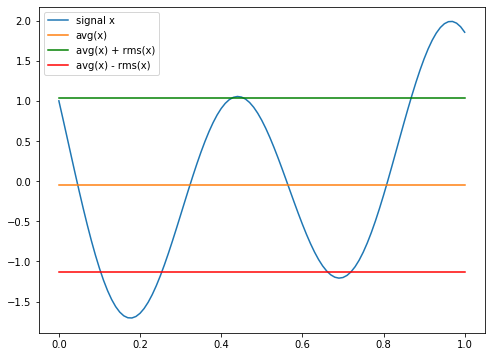

In [9]:
plt.ion()
plt.figure(figsize=(8, 6))
plt.plot(t, x, label='signal x')
plt.plot(t, np.mean(x) * np.ones(len(x)), label='avg(x)')
plt.plot(t, (np.mean(x) + rms(x)) * np.ones(len(x)), 'g', label='avg(x) + rms(x)')
plt.plot(t, (np.mean(x) - rms(x)) * np.ones(len(x)), 'r', label='avg(x) - rms(x)')
plt.legend()
plt.show()

## Chebyshev inequality

The Chebyshev inequality states that the number of entries of an n-vector x that have absolute value at least a is no more than $\left\| x \right\|^2/a^2 = n*rms(x)^2/a^2$.
If the number is, say, 12.15, we can conclude that no more than 12 entries have absolute
value at least a, since the number of entries is an integer. So the Chebyshev bound
can be improved to be floor($\left\|x\right\|^2 / a$), where floor(u) is the integer part of a positive
number.

In [10]:
cheb_bound = lambda x,a: np.floor(sum(x**2)/a)
a = 1.5
print(cheb_bound(x, a))

79.0


In [11]:
# Number of entries of x with |x_i| >= a
print(sum(abs(x) >= a))
# This says there can be *at most*:
# 79 of the 101 values in x, with an absolute value of at least 1.5
# in fact, there are 20

20


# 3.2 Distance

## Distance

The distance between two vectors is dist(x, y) = ||x − y|| (We can use different functions to calculate the distance)

In [12]:
u = np.array([1.8, 2.0, -3.7, 4.7])
v = np.array([0.6, 2.1, 1.9, -1.4])
w = np.array([2.0, 1.9, -4.0, 4.6])
print(np.linalg.norm(u - v))
print(np.linalg.norm(u - w))
print(np.linalg.norm(v - w))

8.367795408588812
0.3872983346207417
8.532877591996735


## Nearest neighbor

In [13]:
# np.argmin: Returns the indices of the minimum values along an axis.
near_neigh = lambda x, z: z[np.argmin([np.linalg.norm(x-y) for y in z])]

x = np.array([5, 6])
y = np.array([3, 3])
z = ([2, 1], [7, 2], [5.5, 4], [4, 8], [1, 5], [9, 6])

print(near_neigh(x, z))
print(near_neigh(y, z))

[5.5, 4]
[2, 1]


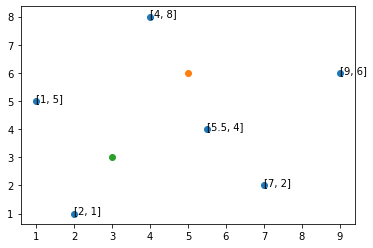

In [21]:
plt.scatter(*zip(*z))
n = [str(i) for i in z]
for i, txt in enumerate(n):
    plt.annotate(txt, (z[i][0], z[i][1]))
plt.scatter(x[0], x[1])
plt.scatter(y[0], y[1])
plt.show()

# 3.3 Standard Deviation

## De-meaning a vector

We refer to the vector x − **avg**(x)**1** as the de-meaned version of x.

In [23]:
de_mean = lambda x: x - np.mean(x) # x - sum(x)/len(x) 
x = np.array([1,-2.2,3])
print ('Average of x: ', np.mean(x))
x_tilde = de_mean(x)
print('x_tilde: ',x_tilde)
print('Average of x_tilde: ',np.mean(x_tilde))

Average of x:  0.6
x_tilde:  [ 0.4 -2.8  2.4]
Average of x_tilde:  -1.4802973661668753e-16


## Standard deviation

We can define a function that corresponding to the VMLS definition of the standard deviation of a vector, std(x) = ||x − **avg**(x)**1**||/$\sqrt n$, where n is the length of the vector. (Standard deviation is RMS of a de-meaned vector)

In [24]:
x = np.random.random(100)
stdev = lambda x: np.linalg.norm(x - sum(x)/len(x))/(len(x)**0.5)
print(stdev(x))
print(np.std(x))

0.25424581335390084
0.25424581335390084


## Standardizing a vector

If a vector x isn’t constant (i.e., at least two of its entries are different), we can standardize it, by subtracting its mean and dividing by its standard deviation. **The resulting standardized vector has mean value zero and RMS value one.** Its entries are called z-scores.

In [25]:
def standardize(x):
    x_tilde = x - np.mean(x)
    return x_tilde/np.std(x_tilde)
x = np.random.random(100)
np.mean(x), np.std(x)

(0.5157851218285593, 0.2819337747133978)

In [26]:
z = standardize(x)
np.mean(z), np.std(z)

(-3.763656053479281e-16, 1.0)

# 3.4 Angle

## Angle

In Euclidean space, a Euclidean vector is a geometric object that possesses both a magnitude and a direction. A vector can be pictured as an arrow. Its magnitude is its length, and its direction is the direction to which the arrow points. The magnitude of a vector a is denoted by ${\displaystyle \left\|\mathbf {a} \right\|}$. The dot product of two Euclidean vectors a and b is defined by

$${\displaystyle \mathbf {a} \cdot \mathbf {b} =\|\mathbf {a} \|\ \|\mathbf {b} \|\cos \theta ,}$$
where θ is the angle between a and b.

https://en.wikipedia.org/wiki/Dot_product

In [28]:
#Define angle function, which returns radians
ang = lambda x,y : np.arccos(x @ y / (np.linalg.norm(x) * np.linalg.norm(y)))
a = np.array([1, 2, -1])
b = np.array([2, 0, -3])
print('angle (radians):', ang(a, b))

angle (radians): 0.9689825515916383


In [30]:
#Get angle in degrees
print('angle (degrees):', ang(a,b) * (360/(2*np.pi)))

angle (degrees): 55.51861062801842


## Pearson correlation coefficient

The Pearson correlation coefficient between two vectors a and b (with nonzero standard deviation) is defined as
$$
\rho =\frac{\tilde{a}^T \tilde{b}}{\left\| \tilde{a} \right\| \left\| \tilde{b} \right\|},
$$
where $\left\| \tilde{a} \right\|$ and $\left\| \tilde{b} \right\|$ are the de-meaned versions of a and b, respectively.

**Pearson correlation coefficient is the demeaned version of an angle**

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [47]:
def corr_coef(a, b):
    a_tilde = a - np.mean(a)
    b_tilde = b - np.mean(b)
    denom = (np.linalg.norm(a_tilde) * np.linalg.norm(b_tilde))
    return (a_tilde @ b_tilde) /denom

a = np.array([4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4])
b = np.array([6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2])
print('rho_aa:', corr_coef(a,a), ', angle (degrees):', ang(a-np.mean(a), a-np.mean(a)) * (360/(2*np.pi)))
print('rho_ab:', corr_coef(a,b), ', angle (degrees):', ang(a-np.mean(a), b-np.mean(b)) * (360/(2*np.pi)))

rho_aa: 1.0 , angle (degrees): 0.0
rho_ab: 0.9678196342570433 , angle (degrees): 14.57487024478894


In [48]:
a = np.array([4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1])
b = np.array([5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5])
print('rho_ab:', corr_coef(a,b), ', angle (degrees):', ang(a-np.mean(a), b-np.mean(b)) * (360/(2*np.pi)))

rho_ab: -0.9875211120643732 , angle (degrees): 170.9389560825482


In [49]:
a = np.array([-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0])
b = np.array([5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2])
print('rho_ab:', corr_coef(a,b), ', angle (degrees):', ang(a-np.mean(a), b-np.mean(b)) * (360/(2*np.pi)))

rho_ab: 0.0040209766613670496 , angle (degrees): 89.76961438695807


# 3.5 Complexity

Let’s check that the time to compute the correlation coefficient of two n-vectors is approximately linear in n.

In [50]:
x = np.random.random(10**6)
y = np.random.random(10**6)

In [51]:
%timeit corr_coef(x, y)

12.2 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
x = np.random.random(10**7)
y = np.random.random(10**7)

In [54]:
%timeit corr_coef(x, y)

124 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
x = np.random.random(10**8)
y = np.random.random(10**8)

In [56]:
%timeit corr_coef(x, y)

1.11 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
